In [34]:
import numpy as np

import matplotlib.pyplot as plt
from cobaya.yaml import yaml_load_file
from cobaya.model import get_model
%matplotlib inline


In [40]:
info_from_yaml = yaml_load_file("/home/fverdian/cobaya/FRA-params/ini_pbj_boss.yaml")
info_from_yaml['likelihood']['pbjboss']['python_path']='/home/fverdian/cobaya/pbj4cobaya/'
info_from_yaml['likelihood']['pbjboss']['pbj_path']='/home/fverdian/cobaya/pbj-multiz/'

model_pbj = get_model(info_from_yaml)

[model] *WARNING* Ignored blocks/options: ['sampler', 'output']


[info] The linear power spectrum will be computed with bacco
Loading linear emulator...
[absl] Fingerprint not found. Saved model loading will continue.
[absl] Fingerprint not found. Saved model loading will continue.


/home/fverdian/anaconda3/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/fverdian/anaconda3/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/fverdian/anaconda3/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.5.2. This might lead to bre

Linear emulator loaded in memory.
[info] Infrared resummation: True, kind: EH
[info] Alcock-Paczynski distortions: True
[pbjboss] Observables: ['P0', 'P2']
[pbjboss] Using model_varied_cosmology_analytic_marg_multiz as likelihood model function
[pbjboss] Analyzing boss at redshifts [0.38 0.38 0.61 0.61]
[pbjboss] Analytically marginalizing on ['b2', 'bG2', 'c0', 'c2', 'aP', 'e0k2', 'e2k2']


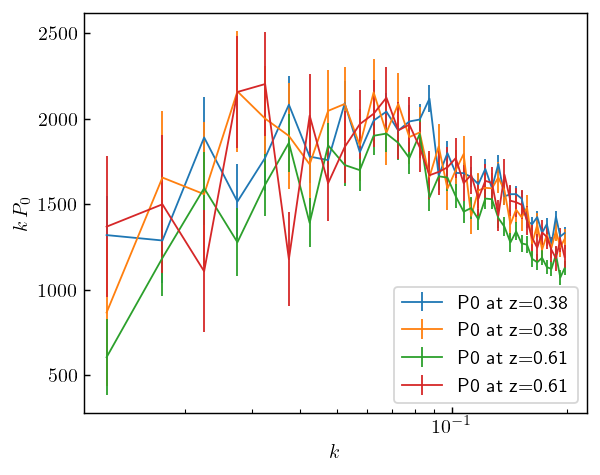

In [41]:
pbjObj = model_pbj.likelihood["pbjboss"].pbjobj
colors=['blue', 'green', 'y','m']
z_bins = pbjObj.z_bins
kCut = pbjObj.kPE[pbjObj.IdxP[0]]

plt.figure(figsize=(5,4),dpi=130)
for i in range(len(z_bins)):
    var = np.diag(pbjObj.Cov[i][:len(kCut),:len(kCut)])
    # plt.loglog(kCut, pbjObj.CutDataVecs[i][0], label=f'P0 at z={z_bins[i]}')
    plt.errorbar(kCut, kCut*pbjObj.CutDataVecs[i][0], yerr=kCut*np.sqrt(var), label=f'P0 at z={z_bins[i]}', linewidth=1.)
plt.xscale('log')
plt.xlabel(r'$k$'),plt.ylabel(r'$k\, P_0$')
plt.legend()
plt.show()

In [43]:
pbjObj.Hubble_adim_fid

array([1.22570054, 1.22570054, 1.40681066, 1.40681066])

In [42]:
point_pbj = {'b1_ngc_z1': 2., 'b1_ngc_z3': 2.,'b1_sgc_z1': 2., 'b1_sgc_z3': 2.}
logposterior = model_pbj.logposterior(point_pbj, as_dict=True)
%matplotlib inline
plt.figure(figsize=(5,4),dpi=130)
for i in range(len(z_bins)):
    var = np.diag(pbjObj.Cov[i][:len(kCut),:len(kCut)])
    plt.errorbar(kCut, pbjObj.CutDataVecs[i][0], yerr=np.sqrt(var), color=colors[i], label=f'P0 at z={z_bins[i]}', linewidth=1.)
    plt.plot(kCut,pbjObj.theorydict[i]['P0'], linestyle='--', color=colors[i])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k$'),plt.ylabel(r'$P_0$')
plt.legend()
plt.show()

[parameterization] *ERROR* The following expected sampled parameters (or their aliases) were not found : {'omega_cdm': ['Och2'], 'h': [], 'n_s': ['ns'], 'logA': []}


LoggedError: The following expected sampled parameters (or their aliases) were not found : {'omega_cdm': ['Och2'], 'h': [], 'n_s': ['ns'], 'logA': []}